## Why modification now?

1. After watching SIR's video I realized that I have to make some big changes to get more out of the data.
2. In this version I am just going to perform Data Cleaning because I perform some Feature Endineering in version `1.0`.

## List some changes

1. Remove some extracted columns/feature.
2. Add some other interesting features which are more helpful.
3. More focus on `BUILT_UP_AREA` but you have to extract others (`SUPER_BUILT_UP_AREA` and `CARPET_AREA`) because every property have not the `BUILT_UP_AREA`.
4. Drop unimportant columns w.r.t. model building.

## Should I work on preprocessed data?

>**No,** because I am cleaning the old again and extracting new features too.


---


In [1]:
from ast import literal_eval

import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/flats.csv')
print(df.shape)
df.head(3)

(2795, 20)


,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120


In [3]:
drop_rows = df[df['nearbyLocations'].str.startswith('[') == False].index
df.iloc[drop_rows]

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
286,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id


In [4]:
df.drop(drop_rows, inplace=True)
df.reset_index(drop=True, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2794 entries, 0 to 2793
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    2794 non-null   object
 1   link             2794 non-null   object
 2   society          2794 non-null   object
 3   price            2793 non-null   object
 4   area             2785 non-null   object
 5   areaWithType     2794 non-null   object
 6   bedRoom          2794 non-null   object
 7   bathroom         2794 non-null   object
 8   balcony          2794 non-null   object
 9   additionalRoom   1627 non-null   object
 10  address          2791 non-null   object
 11  floorNum         2793 non-null   object
 12  facing           2041 non-null   object
 13  agePossession    2793 non-null   object
 14  nearbyLocations  2715 non-null   object
 15  description      2794 non-null   object
 16  furnishDetails   2054 non-null   object
 17  features         2440 non-null   

## Missing values

In [6]:
df.isnull().sum()

property_name         0
link                  0
society               0
price                 1
area                  9
areaWithType          0
bedRoom               0
bathroom              0
balcony               0
additionalRoom     1167
address               3
floorNum              1
facing              753
agePossession         1
nearbyLocations      79
description           0
furnishDetails      740
features            354
rating              327
property_id           0
dtype: int64

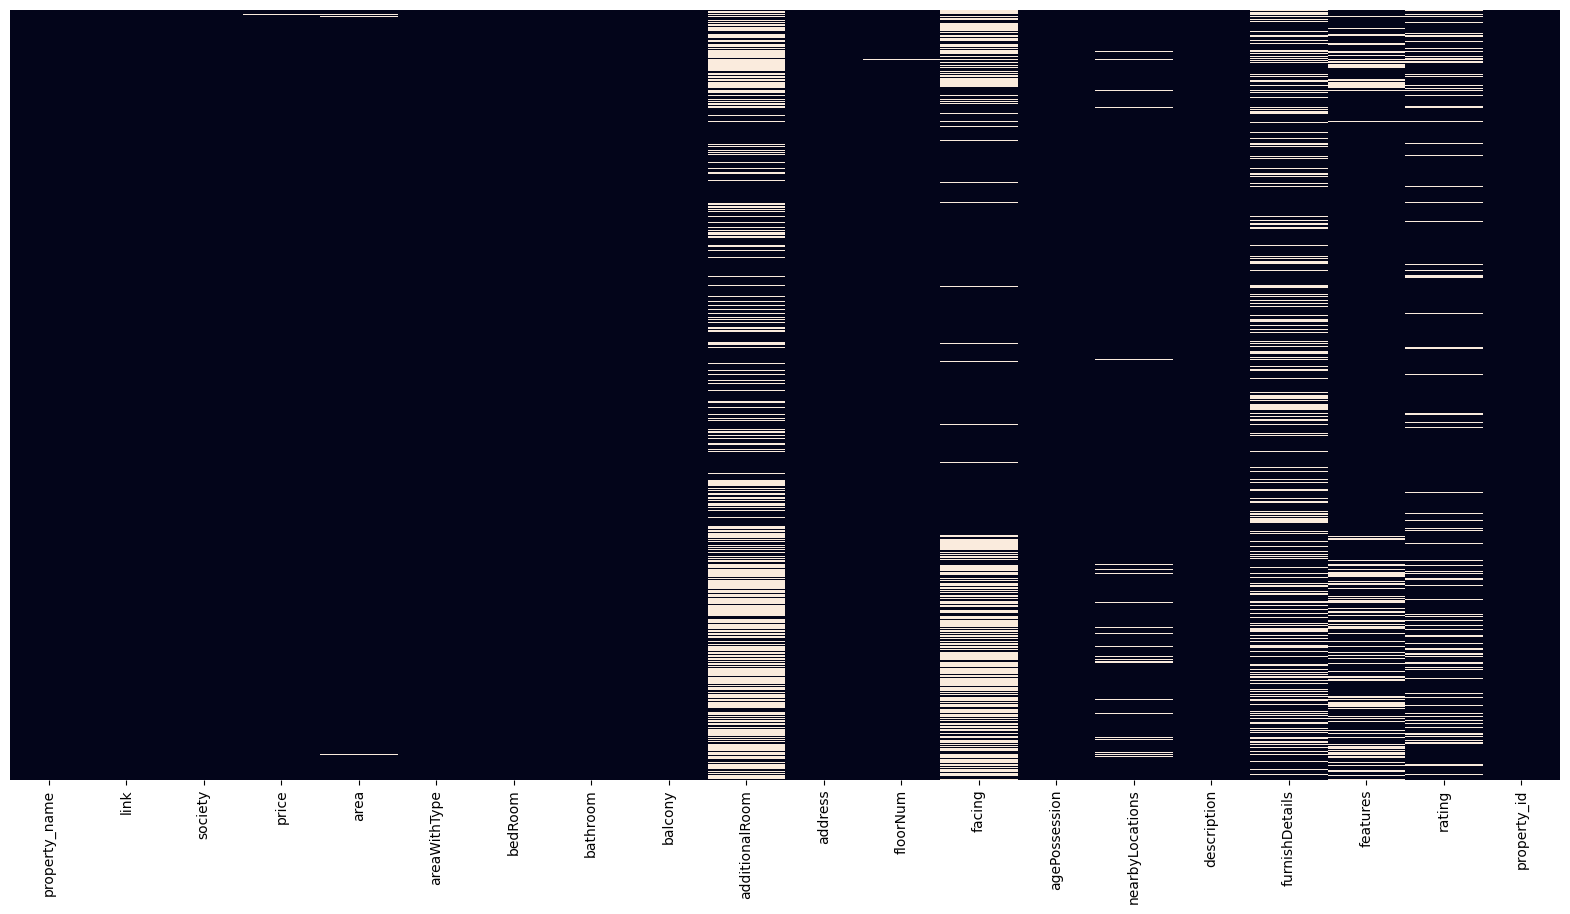

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels='')
plt.show()

In [8]:
drop_rows = []

In [9]:
temp = df[(df['price'].isnull() == True) | (df['price'] == 'Price on Request')]
temp

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
18,2 BHK Flat in Sector 93 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Signature Global Orchard Avenue 2,NaN,NaN,Carpet area: 577.11 (53.62 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"L-1104, Sector 93 Gurgaon, Gurgaon, Haryana",11st of 14 Floors,East,Under Construction,"['Huda Metro Station', 'V3S Sapphire Ninety', ...",Looking for a budget-Friendly 2 bhk flat in a ...,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,H68815396
25,5 BHK Flat in Sector 1 Gurgaon,https://www.99acres.com/5-bhk-bedroom-apartmen...,The New People Apartments,Price on Request,NaN,Built Up area: 4500 (418.06 sq.m.),5 Bedrooms,1 Bathroom,No Balcony,NaN,"Sector 1, Sector 1 Gurgaon, Gurgaon, Haryana",Ground of 1 Floors,NaN,undefined,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",Best in class property available at sector 1 l...,NaN,NaN,NaN,Z68804716
1644,4 BHK Flat in Sector 50 Gurgaon,https://www.99acres.com/4-bhk-bedroom-apartmen...,SS Hibiscus,Price on Request,NaN,Carpet area: 4800 (445.93 sq.m.),4 Bedrooms,4 Bathrooms,3 Balconies,Servant Room,"Sector 50 Gurgaon, Gurgaon, Haryana",7th of 18 Floors,East,5 to 10 Year Old,"['Baani Square', 'SS Plaza', 'Good Earth City ...",4bedroom 4800sq.Ft middle floor apartment avai...,"['4 Fan', '8 Light', 'No AC', 'No Bed', 'No Ch...","['Lift(s)', 'Water purifier', 'Swimming Pool',...","['Environment5 out of 5', 'Lifestyle5 out of 5...",S65406842
1972,1 BHK Flat in Sector 31 Gurgaon,https://www.99acres.com/1-bhk-bedroom-apartmen...,Raheja Atlantis3.8 ★,Price on Request,NaN,Carpet area: 650 (60.39 sq.m.),1 Bedroom,1 Bathroom,1 Balcony,"Pooja Room,Study Room,Servant Room","Yes, Sector 31 Gurgaon, Gurgaon, Haryana",3rd of 15 Floors,East,0 to 1 Year Old,"['Huda Metro Station', 'Reliance Fresh, Indira...",It is my property and good condition and good ...,NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area4 out of 5', 'Construction4 out of...",Q70122610
2054,2 BHK Flat in Sector 79 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Supertech Araville,Price on Request,NaN,Built Up area: 1295 (120.31 sq.m.),2 Bedrooms,2 Bathrooms,No Balcony,NaN,"Sector 79, Sector 79 Gurgaon, Gurgaon, Haryana",15th of 15 Floors,NaN,undefined,NaN,"2 bath, unfurnished, 15th floor (Of 18), super...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle3 out of 5...",M69984000
2357,2 BHK Flat in Sector 37D Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,The Millennia 2,Price on Request,NaN,Carpet area: 552 (51.28 sq.m.),2 Bedrooms,1 Bathroom,1 Balcony,NaN,"Sector 37D Gurgaon, Gurgaon, Haryana",13rd of 13 Floors,NaN,undefined,"['Shri Balaji Hospital and Trauma Center', 'Sh...","1 bath, unfurnished, 13th floor (Of 13), at se...",NaN,NaN,"['Environment4 out of 5', 'Lifestyle4 out of 5...",L69416788
2522,2 BHK Flat in Sector 95A Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,The Roselia 2,Price on Request,NaN,Carpet area: 593 (55.09 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,"Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...",14th of 14 Floors,NaN,undefined,NaN,Best in class property available at sector 95a...,NaN,NaN,"['Environment5 out of 5', 'Lifestyle4.5 out of...",A69074608
2549,3 BHK Flat in Sector-2 Sohna,https://www.99acres.com/3-bhk-bedroom-apartmen...,Supertech Hilltown,Price on Request,NaN,Built Up area: 1720 (159.79 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,NaN,"Sohna Sector 2,gurgaon, Sector-2 Sohna, Gurgao...",4th of 4 Floors,North-East,undefined,NaN,"3 bath, unfurnished, 4th floor (Of 4), overloo...",NaN,NaN,NaN,X66482366
2703,2 BHK Flat in Sector 95A Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,The Roselia 2,Price on Request,NaN,Carpet area: 593 (55.09 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,NaN,"Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...",14

In [10]:
drop_rows += temp.index.tolist()
drop_rows

[18, 25, 1644, 1972, 2054, 2357, 2522, 2549, 2703]

In [11]:
df.drop(index=drop_rows, inplace=True)
df.shape

(2785, 20)

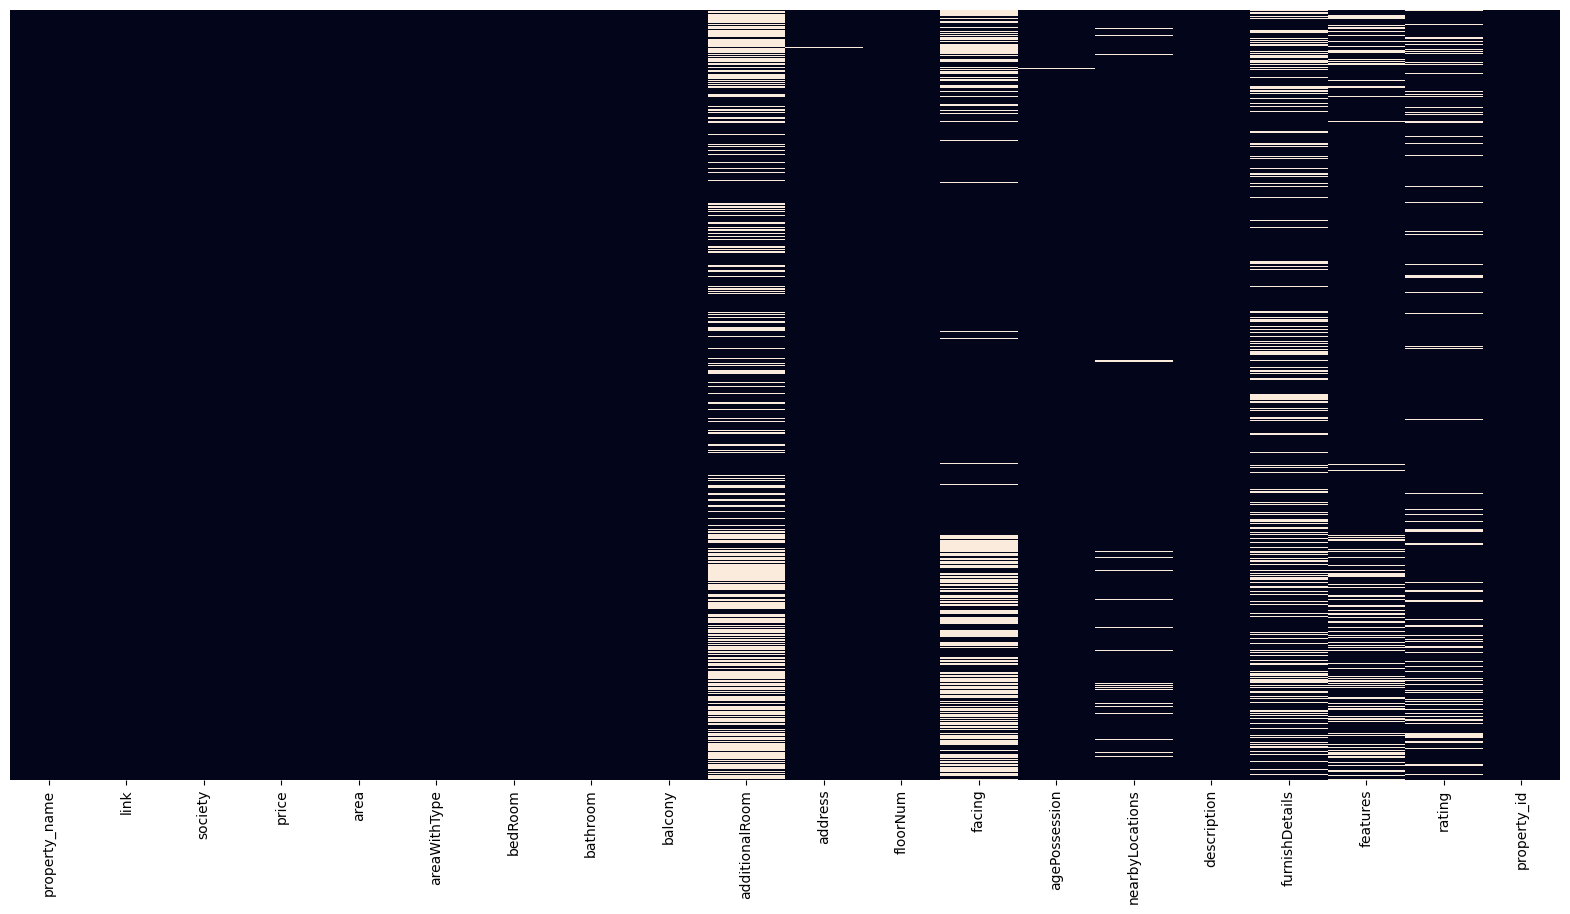

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels='')
plt.show()

## Literal eval all the `list` containing data type columns.

In [13]:
for_literal_eval = ['nearbyLocations', 'furnishDetails', 'features', 'rating']

for col in for_literal_eval:
    df[col] = df[col].fillna('[]')
    df[col] = df[col].apply(literal_eval)

In [14]:
df.loc[[12, 90]].T

,12,90
property_name,3 BHK Flat in Sector 79 Gurgaon,2 BHK Flat in Sector 37D Gurgaon
link,https://www.99acres.com/3-bhk-bedroom-apartmen...,https://www.99acres.com/2-bhk-bedroom-apartmen...
society,Supertech Araville,Signature Global City
price,1.35 Crore,1.1 Crore
area,"₹ 6,940/sq.ft.","₹ 9,838/sq.ft."
areaWithType,Carpet area: 1945 (180.7 sq.m.),Carpet area: 1118 (103.87 sq.m.)
bedRoom,3 Bedrooms,2 Bedrooms
bathroom,3 Bathrooms,2 Bathrooms
balcony,3 Balconies,2 Balconies
additionalRoom,NaN,NaN


## Link

In [15]:
df['link'] = df['link'].str.replace('https://www.99acres.com/', '', regex=False)
df['link'][0]

'2-bhk-bedroom-apartment-flat-for-sale-in-krishna-colony-gurgaon-900-sq-ft-spid-C68850746'

1. These links helps us to scrape the images of the properties.

## Society

In [16]:
df['society'].sample(10)

2042                         AIPL Joy Square
1707                 Mapsko Mount Ville4.1 ★
2625    Signature Global Orchard Avenue3.6 ★
386                       Orchid Petals4.1 ★
356                      Smart World Orchard
463            Bestech Park View Ananda4.2 ★
102                       Supertech Araville
600                     The Close North4.0 ★
1424                      Ramprastha Primera
1622                      Ireo The Corridors
Name: society, dtype: object

In [17]:
# Remove those ratings from society names
df['society'] = df['society'].str.extract(r'^(.*?)(?:\d.\d ★|$)')[0]

## Price

In [18]:
df['price'].str.split(' ').str.get(-1).unique()

array(['Lac', 'Crore'], dtype=object)

1. There is only two distinct price values in the dataset i.e. **Lac and Crore**.
2. I am going convert all the values in **Lac**.

In [19]:
def handle_price(x: str) -> float:
    if x == np.nan or isinstance(x, float):
        return float(x)

    if 'crore' in x:
        price = x.replace('crore', '')
        return float(price) * 100

    return float(x)

In [20]:
df['price'] = (
    df['price'].str.lower().str.replace(r'\s|lac', '', regex=True).apply(handle_price).astype(float)
)

## aeraWithType

In [21]:
df['areaWithType'].sample(10)

511     Super Built up area 1852(172.06 sq.m.)Carpet a...
1772                Super Built up area 1578(146.6 sq.m.)
1079    Super Built up area 1534(142.51 sq.m.)Carpet a...
2572                   Built Up area: 1990 (184.88 sq.m.)
2424    Built Up area: 743 (69.03 sq.m.)Carpet area: 6...
1159                       Carpet area: 360 (33.45 sq.m.)
666                        Carpet area: 302 (28.06 sq.m.)
2112    Built Up area: 2134 (198.26 sq.m.)Carpet area:...
2625                     Built Up area: 597 (55.46 sq.m.)
1821               Super Built up area 1995(185.34 sq.m.)
Name: areaWithType, dtype: object

This `areaWithType` column contains the **`BUILT_UP_AREA`, `SUPER_BUILT_UP_AREA` and `CARPET_AREA`** related to the flats. But Not every rows contains all the params instead some contains anyone or some contains all of them. And that's a problem.

I am going to etract fetures from this in [`1.1_FEAT_ENG.ipynb`](./1.1_FEAT_ENG.ipynb)

## area

In [22]:
df.head(3)

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Krishna Colony,2-bhk-bedroom-apartment-flat-for-sale-in-krish...,maa bhagwati residency,45.0,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"[Chintapurni Mandir, State bank ATM, Pearl Den...",So with lift.Maa bhagwati residency is one of ...,"[3 Fan, 4 Light, 1 Wardrobe, No AC, No Bed, No...","[Feng Shui / Vaastu Compliant, Security / Fire...","[Environment4 out of 5, Safety4 out of 5, Life...",C68850746
1,2 BHK Flat in Ashok Vihar,2-bhk-bedroom-apartment-flat-for-sale-in-apna-...,Apna Enclave,50.0,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"[Chintapurni Mandir, Sheetla Mata Mandir, Stat...","Property situated on main road, railway statio...","[3 Wardrobe, 4 Fan, 1 Exhaust Fan, 1 Geyser, 3...","[Security / Fire Alarm, Maintenance Staff, Wat...","[Environment4 out of 5, Safety4 out of 5, Life...",H68850564
2,2 BHK Flat in Sohna,2-bhk-bedroom-apartment-flat-for-sale-in-tulsi...,Tulsiani Easy in Homes,40.0,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"[Huda City Metro, Golf Course extn road, Rajiv...","This property is 15 km away from badshapur, gu...",[],"[Power Back-up, Feng Shui / Vaastu Compliant, ...","[Environment4 out of 5, Safety4 out of 5, Life...",J68850120


- `area` column is not reliable for analysis because it is not consistent.
- It refers any of areas of the flat from **super built up area, built up area and carpet area**.
- Thats why I am going to  drop this column.

- Instead I am going to extract area feature from `areaWithType` column. Also that is not consistent as well. But I will deal with it later.

## Bedroom, Bathroom, Balcony

In [23]:
x = ['bedRoom', 'bathroom', 'balcony']

for col in x:
    print(f'{col}: {df[col].unique().tolist()}')

bedRoom: ['2 Bedrooms', '3 Bedrooms', '4 Bedrooms', '1 Bedroom', '5 Bedrooms', '6 Bedrooms']
bathroom: ['2 Bathrooms', '3 Bathrooms', '4 Bathrooms', '5 Bathrooms', '1 Bathroom', '6 Bathrooms', '7 Bathrooms']
balcony: ['1 Balcony', '3 Balconies', '2 Balconies', '3+ Balconies', 'No Balcony']


In [24]:
for col in x:
    df[col] = (
        df[col]
        .str.split(r' ', regex=True)
        .str.get(0)
        .apply(lambda x: 0 if x == 'No' else -1 if '+' in x else x)
    )

## additionalRoom

In [25]:
df['additionalRoom'].isnull().sum() / df.shape[0]

0.41651705565529623

This column has about **42%** of missing values. Due to this I am not performing any analysis on this.

In [26]:
df['additionalRoom'].fillna('not available', inplace=True)

## address

In [27]:
df.address.duplicated().sum()

1613

In [28]:
df.address.nunique()

1171

In [29]:
df['address'] = df['address'].str.lower()

## floorNum

In [30]:
df[df['floorNum'].isnull()]

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
181,3 BHK Flat in Dwarka Expressway Gurgaon,3-bhk-bedroom-apartment-flat-for-sale-in-dwark...,Experion Heartsong,108.0,"₹ 6,150/sq.ft.",Built Up area: 1758 (163.32 sq.m.),3,3,0,not available,"604, tower b-3, 6th floor,sector 108, dwarka e...",NaN,NaN,Under Construction,[],A property by one of the most reputed builders...,[],[],[],G8922001


In [31]:
df['floorNum'].str.split(' ').str.get(0).str.strip().unique()

array(['4th', '1st', '12nd', '2nd', '5th', '3rd', '14th', '31st', '13rd',
       '25th', 'Ground', '11st', '10th', '20th', '8th', '21st', '6th',
       '9th', '18th', '29th', '7th', '15th', '32nd', '23rd', '43',
       'Basement', '16th', '19th', nan, '17th', '30th', '28th', 'Lower',
       '27th', '33rd', '35th', '26th', '39th', '22nd', '24th', '38th',
       '45', '44', '34th', '40th'], dtype=object)

In [32]:
# No. of rows which does not contains the
# "Number of floor of the flat in the Apartment"
df[df['floorNum'].str.contains(' of ') == False].shape[0]

0

In [33]:
df['floorNum'].str.split(' of ', expand=True)

,0,1
0,4th,4 Floors
1,1st,3 Floors
2,12nd,14 Floors
3,2nd,4 Floors
4,5th,8 Floors
...,...,...
2789,4th,4 Floors
2790,1st,3 Floors
2791,12nd,14 Floors
2792,2nd,4 Floors


In [34]:
df[['nthFloor', 'totalFloor']] = df['floorNum'].str.split(' of ', expand=True)
df[['nthFloor', 'totalFloor']].sample(7)

,nthFloor,totalFloor
1881,12nd,34 Floors
2769,27th,30 Floors
2633,23rd,23 Floors
1577,27th,29 Floors
2018,2nd,4 Floors
2619,5th,10 Floors
2452,17th,26 Floors


In [35]:
def handle_nthFloor(x: str) -> float:
    if x in ['Ground', 'Lower Ground', 'Basement']:
        return 0
    if isinstance(x, float):
        return x
    if len(x) > 2:
        return int(x[:-2])
    return int(x)

In [36]:
# There is 1 nan which throw error
df['nthFloor'] = df['nthFloor'].str.strip().apply(handle_nthFloor)

In [37]:
df['totalFloor'] = df['totalFloor'].str.removesuffix(' Floors').astype(float)

As the Sir suggests to merge the both dataset **flats and houses** we doesn't need `totalFloor` column because it is not present in **houses** dataset.

## facing

In [38]:
df.facing.unique()

array(['West', nan, 'North-East', 'South-East', 'North', 'South-West',
       'East', 'North-West', 'South'], dtype=object)

In [39]:
# Approx. 26% data is null
df.facing.isnull().sum() / df.shape[0]

0.26858168761220824

**Facing** column is cleaned no need to worry about it. But it has 26% missing values.

In [40]:
df['facing'].fillna('NA', inplace=True)

## agePossession

In [41]:
df['agePossession'].unique()

array(['1 to 5 Year Old', '10+ Year Old', '0 to 1 Year Old', 'Dec 2023',
       'Under Construction', 'undefined', 'Jun 2024', 'Mar 2024',
       'Dec 2025', 'By 2023', '5 to 10 Year Old', 'Sep 2025', 'Jan 2024',
       'Within 6 months', 'Jan 2027', 'Dec 2024', 'Oct 2024', 'Nov 2023',
       'Jul 2026', 'Feb 2024', 'Oct 2023', 'Jan 2025', 'Aug 2023', nan,
       'By 2024', 'Apr 2024', 'Nov 2025', 'Dec 2026', 'Within 3 months',
       'Apr 2026', 'By 2025', 'Jul 2027', 'Sep 2023', 'By 2027',
       'Jan 2026', 'May 2024', 'Nov 2024', 'Aug 2024', 'Jun 2027',
       'Mar 2025', 'Jul 2024', 'Jul 2025', 'Sep 2027', 'Jun 2025',
       'Jan 2028', 'Aug 2026', 'Mar 2026', 'Aug 2025', 'Oct 2025'],
      dtype=object)

I perform feature extraction on `agePossession` column in [`1.1_FEAT_ENG.ipynb`](./1.1_FEAT_ENG.ipynb) notebook.

## nearbyLocations

#### This data cleaning is done by me although Sir is also going to do but I already did the cleaning in my own way.

In [42]:
df['nearbyLocations'].isnull().sum()

0

In [43]:
df['nearbyLocations'].explode().nunique()

1863

In [44]:
# Some flats has about 50 nearby locations
df['nearbyLocations'].apply(len).max()

50

In [45]:
df['nearbyLocations'].explode().value_counts()[:15]

nearbyLocations
Indira Gandhi International Airport    999
Dwarka Expressway                      629
SkyJumper Trampoline Park              476
Indira Gandhi Intl Airport             407
DPG Institute of Technology            386
Hdfc bank                              386
Garhi Harsaru Junction                 272
Sapphire 83 Mall                       247
The NorthCap University                239
Gurgaon Railway Station                237
Icici bank ATM                         233
IMT Manesar                            212
Icici bank                             209
IGI Airport                            206
Pizza Hut                              204
Name: count, dtype: int64

### Categorize Nearby Locations

In [46]:
locations_category_map = [
    {
        'Transportation': [
            'airport',
            'expressway',
            'metro',
            'railway',
            'road',
            'junction',
            'highway',
            'cng',
            'Hwy',
            'rd',
            'nh',
            'expy',
        ]
    },
    {'Education': ['school', 'college', 'university', 'academy', 'institute']},
    {
        'Healthcare': [
            'hospital',
            'clinic',
            'health',
            'medical',
            'nursing',
            'dr',
            'Dental',
            'Pharmacy',
            'eye',
            'patient',
        ]
    },
    {'Shopping': ['mall', 'market', 'shopping centre', 'complex', 'plaza', 'retail', 'chowk']},
    {
        'Dining': [
            'restaurant',
            'cafe',
            'food',
            'pizza',
            'burger',
            'coffee',
            'kfc',
            'McDonald',
            'dhaba',
            'mess',
            'Mithaas',
            'Tastes',
            'spice',
            'kitchen',
            'Haldiram',
        ]
    },
    {'Accommodation': ['hotel', 'resort', 'inn', 'lodging']},
    {
        'Entertainment': [
            'park',
            'amusement',
            'waterpark',
            'theatre',
            'cinema',
            'pub',
            'club',
            'zoo',
            'stadium',
            'arena',
            'gym',
            'golf',
            'cricket',
            'tennis',
        ]
    },
    {'Service': ['bank', 'pump', 'oil', 'atm']},
]

In [47]:
def categorize(value, category_map):
    for category_dict in category_map:
        for category, keywords in category_dict.items():
            if isinstance(value, float):
                return 'Other'

            if any(keyword.lower() in value.lower() for keyword in keywords):
                return category
    return 'Other'

In [48]:
df['nearbyLocations'].explode().isnull().sum()

75

In [49]:
all_nearby_locations = df['nearbyLocations'].explode().unique().tolist()
len(all_nearby_locations)

1864

#### Categorized Locations DataFrame

In [50]:
# Create a DataFrame with categorized locations
categorized_locations = []
for items in all_nearby_locations:
    category = categorize(items, locations_category_map)
    categorized_locations.append({'Location': items, 'Category': category})

In [51]:
cat_loc_df = pd.DataFrame(categorized_locations)
cat_loc_df.head()

,Location,Category
0,Chintapurni Mandir,Other
1,State bank ATM,Service
2,Pearl Dental Clinic,Healthcare
3,Taneja Hospital,Healthcare
4,Dr. Ashok Jain,Healthcare


In [52]:
cat_loc_df['Category'].value_counts()

Category
Other             450
Healthcare        414
Education         288
Transportation    287
Shopping          128
Service           106
Entertainment      96
Accommodation      49
Dining             46
Name: count, dtype: int64

In [53]:
cat_loc_df['Location'][cat_loc_df['Category'] == 'Other'].shape[0]

450

There are many locations which are not classified by this method but I will deal with this after watching the CampusX approach.

### Perform Feature Extraction

In [54]:
def perform_feature_extraction(
    df: DataFrame,
    column_containing_locations: str,
    category_map: list[dict[str, list[str]]],
) -> DataFrame:
    # Create new columns for each category
    new_cols = []
    for category_dict in category_map:
        for category in category_dict.keys():
            df[category] = 0
            new_cols.append(category)

    # Iterate through each row and update category counts
    for index, row in df.iterrows():
        location_counts = {category: 0 for category in new_cols}

        for location in row[column_containing_locations]:
            category = categorize(location, category_map)
            if category != 'Other':
                location_counts[category] += 1

        df.loc[index, new_cols] = pd.Series(location_counts)  # type: ignore

    return df

In [55]:
df = perform_feature_extraction(df, 'nearbyLocations', locations_category_map)
df.shape

(2785, 30)

## rating

In [56]:
df['rating'].sample(5).tolist()

[['Green Area5 out of 5',
  'Construction4 out of 5',
  'Management4 out of 5',
  'Amenities5 out of 5',
  'Connectivity4 out of 5'],
 ['Green Area4.5 out of 5',
  'Construction4 out of 5',
  'Management3 out of 5',
  'Amenities4 out of 5',
  'Connectivity4 out of 5'],
 ['Environment4 out of 5',
  'Lifestyle4 out of 5',
  'Connectivity4 out of 5',
  'Safety4 out of 5'],
 ['Green Area5 out of 5',
  'Construction4 out of 5',
  'Management4.5 out of 5',
  'Amenities5 out of 5',
  'Connectivity4 out of 5'],
 []]

In [57]:
df['rating'].astype(str).str.extract(r'Green Area(\d)').isnull().sum()[0]

1155

In [58]:
df['rating'].astype(str).str.extract(r'Safety(\d)').isnull().sum()[0]

1954

In [59]:
df['rating'].astype(str).str.extract(r'Connectivity(\d)').isnull().sum()[0]

324

In [60]:
df['rating'].astype(str).str.extract(r'Connectivity(\d)').value_counts()

4    1477
5     622
3     339
2      23
Name: count, dtype: int64

- In my opinion, rating column has no use because if you try to extract the feature like you get many null values.
- If you filtered it then you get unblanced data.

**That's why we are going to remove this column**

## features

There are 31 distinct features given in the dataset.

In [61]:
df['features'].explode().unique()

array(['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)',
       'Water Storage', 'Visitor Parking', 'Maintenance Staff', 'Park',
       'Power Back-up', 'Intercom Facility', 'Swimming Pool',
       'Fitness Centre / GYM', 'Club house / Community Center',
       'Private Garden / Terrace', 'False Ceiling Lighting',
       'Natural Light', 'Airy Rooms', 'Water softening plant', nan,
       'Security Personnel', 'Internet/wi-fi connectivity',
       'Rain Water Harvesting', 'Separate entry for servant room',
       'Spacious Interiors', 'Waste Disposal', 'Piped-gas',
       'Shopping Centre', 'Water purifier', 'No open drainage around',
       'Low Density Society', 'Bank Attached Property',
       'High Ceiling Height', 'Centrally Air Conditioned',
       'Recently Renovated'], dtype=object)

In [62]:
df['features'].explode().value_counts()[:10]

features
Lift(s)                          2321
Park                             2299
Maintenance Staff                2093
Intercom Facility                1966
Visitor Parking                  1864
Security / Fire Alarm            1762
Water Storage                    1744
Fitness Centre / GYM             1638
Feng Shui / Vaastu Compliant     1634
Club house / Community Center    1611
Name: count, dtype: int64

SIR already perform some other method on this column which is more helpful for analysis.

## furnishDetails

There are 132 distinct **furnishDetails** given in the dataset.

In [63]:
print('nunique: ', df['furnishDetails'].explode().nunique())
df['furnishDetails'].explode().unique()

nunique:  131


array(['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney',
       'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser',
       'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa',
       'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier',
       '3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light',
       '1 Curtains', '1 Chimney', '1 Modular Kitchen', nan,
       '1 Water Purifier', '2 Fan', '2 AC', 'No Wardrobe', '1 Light',
       'No Fan', '1 Fan', '5 AC', 'No Light', '5 Wardrobe', '8 Fan',
       '20 Light', '6 Fan', '4 Geyser', '55 Light', '10 Wardrobe',
       '7 Fan', '11 Light', '7 AC', '2 Wardrobe', '10 Light', '3 Bed',
       '1 Sofa', '1 Dining Table', '3 Geyser', '2 TV', '2 Geyser',
       '6 Light', '6 Geyser', '1 Stove', '7 Light', '3 AC', '1 Fridge',
       '1 Washing Machine', '1 Microwave', '1 AC', '1 Bed', '5 Light',
       '2 Bed', '4 Wardrobe', '2 Light', '1 TV', '4 Curtains', '12 Light',
       '10 AC', '5 Fan

In [64]:
df['furnishDetails'].explode().value_counts()[:10]

furnishDetails
No TV                 1661
No Bed                1642
No Dining Table       1641
No Sofa               1626
No Washing Machine    1609
No Fridge             1601
No Microwave          1581
No Water Purifier     1493
No Stove              1391
No Curtains           1321
Name: count, dtype: int64

SIR already perform some other method on this column which is more helpful for analysis.

# General Steps

In [65]:
df.shape

(2785, 30)

In [66]:
df.sample(2).T

,2158,590
property_name,4 BHK Flat in Cyber City,4 BHK Flat in Gwal Pahari
link,4-bhk-bedroom-apartment-flat-for-sale-in-dlf-3...,4-bhk-bedroom-apartment-flat-for-sale-in-krris...
society,Dlf 3 Apartment,Krrish Provence Estate
price,250.0,525.0
area,"₹ 7,142/sq.ft.","₹ 9,051/sq.ft."
areaWithType,Super Built up area 3500(325.16 sq.m.),Super Built up area 5800(538.84 sq.m.)
bedRoom,4,4
bathroom,4,5
balcony,-1,-1
additionalRoom,"Pooja Room,Study Room,Servant Room","Pooja Room,Study Room,Servant Room"


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2785 entries, 0 to 2793
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    2785 non-null   object 
 1   link             2785 non-null   object 
 2   society          2785 non-null   object 
 3   price            2785 non-null   float64
 4   area             2785 non-null   object 
 5   areaWithType     2785 non-null   object 
 6   bedRoom          2785 non-null   object 
 7   bathroom         2785 non-null   object 
 8   balcony          2785 non-null   object 
 9   additionalRoom   2785 non-null   object 
 10  address          2782 non-null   object 
 11  floorNum         2784 non-null   object 
 12  facing           2785 non-null   object 
 13  agePossession    2784 non-null   object 
 14  nearbyLocations  2785 non-null   object 
 15  description      2785 non-null   object 
 16  furnishDetails   2785 non-null   object 
 17  features         27

### Genral Steps - End

In [68]:
drop_cols = ['rating', 'floorNum']
df.drop(columns=drop_cols, inplace=True)

## Export Dataset

In [69]:
df.to_csv('data/processed/flats.csv', index=False)